In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import pandas as pd

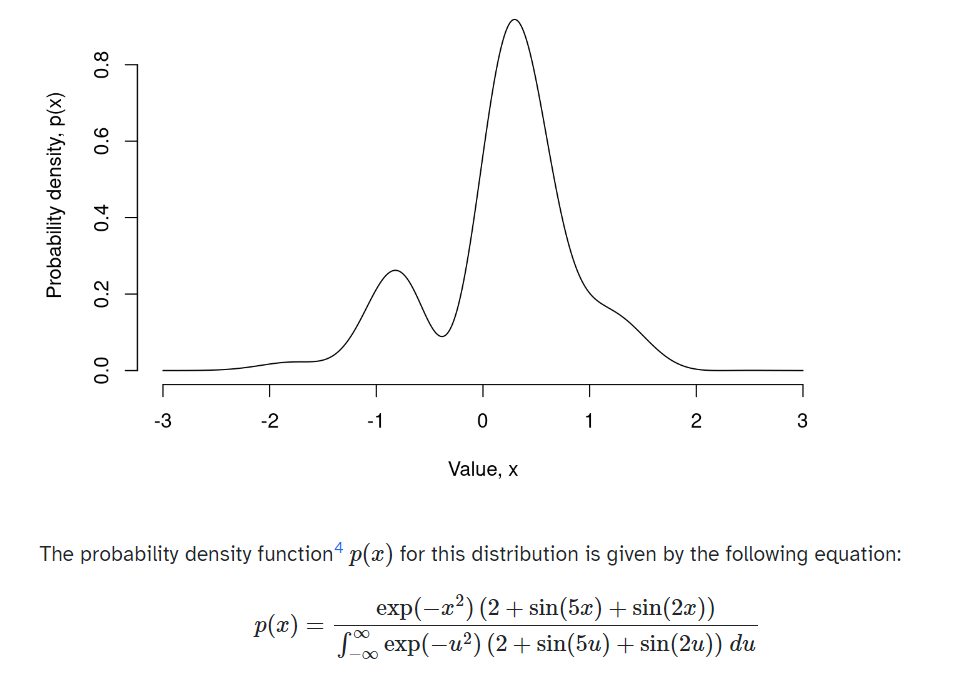;</mtext>
      <mi>d</mi>
      <mi>u</mi>
    </mrow>
  </mfrac>
</math>

In [34]:
def target_probability(x):
    '''
    Calculates the numerator term in the equation describing probability density
    '''
    target = math.exp(-x**2) * (2+ math.sin(2*x) + math.sin(5*x))
    return target

Next we define a metropolis_step() function that takes some value x corresponding to the current state of the Markov chain, and a parameter sigma that describes the standard deviation of the proposal distribution

In [39]:
def metropolis_step(x,sigma):
    
    # Generate candidate
    proposed_x = np.random.normal(loc=x, scale=sigma, size=1)[0]

    # Calculate acceptance probability
    accept_prob = min(1, target_probability(proposed_x)/target_probability(x))

    # Generate a random uniform number
    u = np.random.uniform(low=0.0, high=1.0, size=1)[0]

    # Accept/reject
    if(u<=accept_prob):
        value = proposed_x
        accepted = True
    else:
        value = x
        accepted = False

    out = {'value': value, 'accepted': accepted}
    return out

Finally we can write a metropolis_sampler() function that runs the Metropolis algorithm for some number of steps

In [44]:
def metropolis_sampler(initial_value, n = 1000, sigma = 1, burnin = 0, lag = 1):

    # Initialize a list to store results
    results = []

    # Set the current state to initial value
    current_state = initial_value

    # Burnin phase: discard the initial samples to allow the chain to converge
    for i in range(burnin):
        out = metropolis_step(current_state, sigma)
        current_state = out['value']

    # MCMC Sampling phase
    for i in range(n):
        for j in range(lag):
            out = metropolis_step(current_state, sigma)
            current_state = out['value']
        # Store the result in the list
        results.append(out)
        
    # Convert the list of dictionaries to a DataFrame
    results = pd.DataFrame(results)

    return results

*burnin*: the number of iterations we run the sampler before recording results. 
It reduces the bias towards our initial guess.

*lag*: the number of iterations we run the sampler between successive samples.
It reduces autocorrelation between successive samples.

In [46]:
out = metropolis_sampler(initial_value=0)
out.head(25)

,value,accepted
0,0.000000,False
1,0.423488,True
2,0.423488,False
3,0.238853,True
4,0.238853,False
5,0.238853,False
6,0.238853,False
7,0.238853,False
8,0.258731,True
9,0.258731,False


## Resources: 
1. Navarro, Danielle. 2023. “The Metropolis-Hastings Algorithm.” April 12, 2023. https://blog.djnavarro.net/posts/2023-04-12_metropolis-hastings.
2. Bayesian Analysis with Python